<a href="https://colab.research.google.com/github/richy1996/Springboard_capstone3/blob/main/music/music_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [ ]:
!pip install --upgrade pyfluidsynth

In [ ]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 7.4 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=ee6d0b793dd10191d11a9edd405f8bd784ac5314cd604445d5490937f79563d4
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [ ]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copy the midis.zip file from google drive to current directory
!cp /content/drive/MyDrive/midis.zip /content/

In [ ]:
# unzip the midis.zip file
!unzip /content/midis.zip

Archive:  /content/midis.zip
   creating: content/midis/
  inflating: content/midis/op87_04b.mid  
  inflating: content/midis/waltz_08.mid  
  inflating: content/midis/poissons.mid  
  inflating: content/midis/op6n09m4.mid  
  inflating: content/midis/maz25n3.mid  
  inflating: content/midis/bydlo.mid  
  inflating: content/midis/kinder5.mid  
  inflating: content/midis/rachmm6.mid  
  inflating: content/midis/waltz_03.mid  
  inflating: content/midis/dsch10-2.mid  
  inflating: content/midis/tristes2.mid  
  inflating: content/midis/hans3a.mid  
  inflating: content/midis/hmwoo23b.mid  
  inflating: content/midis/op6n08m3.mid  
  inflating: content/midis/satieson.mid  
  inflating: content/midis/beeth9-1.mid  
  inflating: content/midis/hmcello1.mid  
  inflating: content/midis/chpson3d.mid  
  inflating: content/midis/suite_3.mid  
  inflating: content/midis/adelina.mid  
  inflating: content/midis/schumann.mid  
  inflating: content/midis/bwv977.mid  
  inflating: content/midis/vs2-

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copy the midis.zip file from google drive to current directory
!cp /content/drive/MyDrive/midis.zip /content/

In [ ]:
# unzip the midis.zip file
!unzip /content/midis.zip

Archive:  /content/midis.zip
   creating: content/midis/
  inflating: content/midis/op87_04b.mid  
  inflating: content/midis/waltz_08.mid  
  inflating: content/midis/poissons.mid  
  inflating: content/midis/op6n09m4.mid  
  inflating: content/midis/maz25n3.mid  
  inflating: content/midis/bydlo.mid  
  inflating: content/midis/kinder5.mid  
  inflating: content/midis/rachmm6.mid  
  inflating: content/midis/waltz_03.mid  
  inflating: content/midis/dsch10-2.mid  
  inflating: content/midis/tristes2.mid  
  inflating: content/midis/hans3a.mid  
  inflating: content/midis/hmwoo23b.mid  
  inflating: content/midis/op6n08m3.mid  
  inflating: content/midis/satieson.mid  
  inflating: content/midis/beeth9-1.mid  
  inflating: content/midis/hmcello1.mid  
  inflating: content/midis/chpson3d.mid  
  inflating: content/midis/suite_3.mid  
  inflating: content/midis/adelina.mid  
  inflating: content/midis/schumann.mid  
  inflating: content/midis/bwv977.mid  
  inflating: content/midis/vs2-

In [ ]:
filenames = glob.glob("/content/content/midis/*.mid")
print('Number of files:', len(filenames))

Number of files: 1325


In [ ]:
sample_file = filenames[1]
# sample_file = "/content/for_elise_by_beethoven.mid"
print(sample_file)

/content/content/midis/blute.mid


Generate a `PrettyMIDI` object for the sample MIDI file.

In [ ]:
pm = pretty_midi.PrettyMIDI(sample_file)
pm

/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Play the sample file.

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [ ]:
display_audio(pm)

Extract the notes from the sample MIDI file.

In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [ ]:
file_path = '/content/drive/MyDrive/Springboard/Capstone 3/all_notes.csv'

all_notes = pd.read_csv(file_path).drop(columns=['Unnamed: 0'])
all_notes.head()

Next, create a `tf.data.Dataset` from the parsed notes.

In [ ]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)
train_notes

array([[39.        ,  0.        ,  3.73798027],
       [43.        ,  3.7499995 ,  0.13221152],
       [46.        ,  0.14423075,  0.13221152],
       ...,
       [65.        ,  0.47005208,  0.5390625 ],
       [65.        ,  0.84114583,  3.29947917],
       [41.        ,  0.        ,  3.29947917]])

In [ ]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

We'll train the model on batches of sequences of notes. Each example will consist of a sequence of notes as the input features, and the next note as the label. In this way, the model will be trained to predict the next note in a sequence.

In [ ]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

Set the sequence length for each example. The size of the vocabulary (`vocab_size`) is set to 128 representing all the pitches supported by `pretty_midi`.

In [ ]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

The shape of the dataset is ```(seq_length,1)```, meaning that the model will take seq_length notes as input, and learn to predict the following note as output.

In [ ]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.3125     0.         0.05729167]
 [0.328125   0.0625     0.05729167]
 [0.3125     0.0625     0.05729167]
 [0.328125   0.0625     0.05729167]
 [0.3125     0.0625     0.05729167]
 [0.328125   0.0625     0.05729167]
 [0.3125     0.0625     0.05729167]
 [0.328125   0.0625     0.05729167]
 [0.3125     0.0625     0.05729167]
 [0.328125   0.0625     0.05729167]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=42.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.0625>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.04166666666666652>}


Batch the examples, and configure the dataset for performance.

In [ ]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))
buffer_size

1570342

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

# Create and train the model

The model will have three outputs, one for each note variable. For `step` and `duration`, we'll use a custom loss function based on mean squared error that encourages the model to output non-negative values.

In [ ]:
from tensorflow.keras.utils import register_keras_serializable

In [ ]:
@register_keras_serializable()
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

# Model 1


- First model will be in the middle based on complexity.

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm_2 (LSTM)               (None, 128)                  67584     ['input_3[0][0]']             
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_2[0][0]']              
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm_2[0][0]']              
                                                                                            

Testing the `model.evaluate` function, you can see that the `pitch` loss is significantly greater than the `step` and `duration` losses.
Note that `loss` is the total loss computed by summing all the other losses and is currently dominated by the `pitch` loss.

In [ ]:
%%time
losses = model.evaluate(train_ds, return_dict=True)
losses

24536/24536 [==============================] - 298s 4ms/step - loss: 7.9371 - duration_loss: 0.2722 - pitch_loss: 4.8529 - step_loss: 2.8120
CPU times: user 5min 53s, sys: 37.7 s, total: 6min 31s
Wall time: 5min 22s


{'loss': 7.9371209144592285,
 'duration_loss': 0.27216434478759766,
 'pitch_loss': 4.852934837341309,
 'step_loss': 2.8120133876800537}

One way to balance this is to use the `loss_weights` argument to compile:

In [ ]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

The `loss` then becomes the weighted sum of the individual losses.

In [ ]:
%%time
model.evaluate(train_ds, return_dict=True)

24536/24536 [==============================] - 82s 3ms/step - loss: 3.3268 - duration_loss: 0.2722 - pitch_loss: 4.8529 - step_loss: 2.8120
CPU times: user 1min 24s, sys: 5.59 s, total: 1min 30s
Wall time: 1min 21s


{'loss': 3.3268373012542725,
 'duration_loss': 0.27216434478759766,
 'pitch_loss': 4.852934837341309,
 'step_loss': 2.8120133876800537}

Train the model.

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
24536/24536 [==============================] - 132s 5ms/step - loss: 1.9720 - duration_loss: 0.1216 - pitch_loss: 3.7228 - step_loss: 1.6643
Epoch 2/50
24536/24536 [==============================] - 129s 5ms/step - loss: 1.9481 - duration_loss: 0.1185 - pitch_loss: 3.6151 - step_loss: 1.6488
Epoch 3/50
24536/24536 [==============================] - 130s 5ms/step - loss: 1.9444 - duration_loss: 0.1183 - pitch_loss: 3.5863 - step_loss: 1.6467
Epoch 4/50
24536/24536 [==============================] - 130s 5ms/step - loss: 1.9393 - duration_loss: 0.1174 - pitch_loss: 3.5450 - step_loss: 1.6447
Epoch 5/50
24536/24536 [==============================] - 129s 5ms/step - loss: 1.9358 - duration_loss: 0.1175 - pitch_loss: 3.5181 - step_loss: 1.6424
Epoch 6/50
24536/24536 [==============================] - 131s 5ms/step - loss: 1.9339 - duration_loss: 0.1168 - pitch_loss: 3.5005 - step_loss: 1.6420
Epoch 7/50
24536/24536 [==============================] - 129s 5ms/step - loss: 1.9320 -

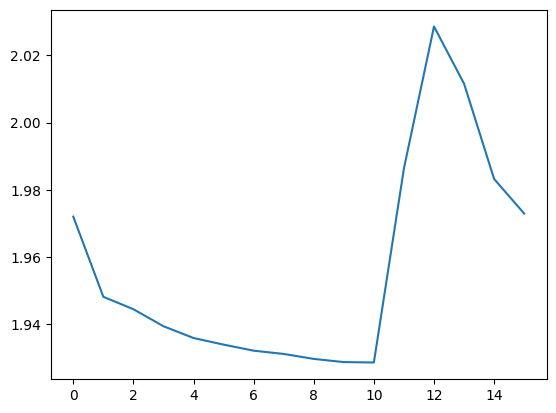

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [ ]:
# save model to disk
model.save('model1.keras')

In [ ]:
# copy to /content/drive/MyDrive/Springboard/Capstone 3

!cp model1.keras '/content/drive/MyDrive/Springboard/Capstone 3/'

In [ ]:
# load model from disk

model1 = tf.keras.models.load_model('/content/drive/MyDrive/Springboard/Capstone 3/model1.keras',
                                    custom_objects={'mse_with_positive_pressure': mse_with_positive_pressure})
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm_2 (LSTM)               (None, 128)                  67584     ['input_3[0][0]']             
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_2[0][0]']              
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm_2[0][0]']              
                                                                                            

# Model 2

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)

# First LSTM layer with return_sequences=True to return the full sequence to the next layer
x = tf.keras.layers.LSTM(128, return_sequences=True)(inputs)

# Second LSTM layer
x = tf.keras.layers.LSTM(128)(x)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 25, 128)              67584     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 128)                  131584    ['lstm[0][0]']                
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_1[0][0]']              
                                                                                              

In [ ]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

Train the model.

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

In [ ]:
%%time
model.evaluate(train_ds, return_dict=True)

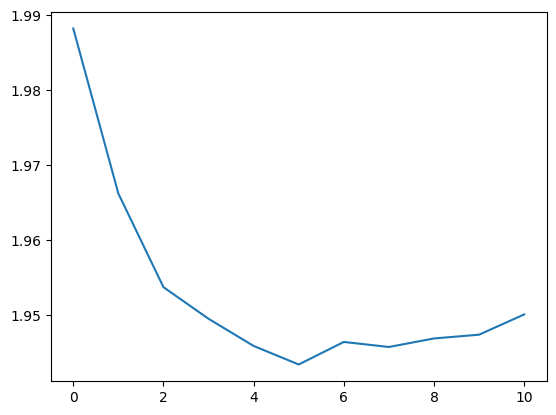

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [ ]:
# save model to disk
model.save('model2.keras')

In [ ]:
# copy to /content/drive/MyDrive/Springboard/Capstone 3

!cp model2.keras '/content/drive/MyDrive/Springboard/Capstone 3/'

In [ ]:
model2 = tf.keras.models.load_model('/content/drive/MyDrive/Springboard/Capstone 3/model2.keras',
                                    custom_objects={'mse_with_positive_pressure': mse_with_positive_pressure})
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 25, 128)              67584     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 128)                  131584    ['lstm[0][0]']                
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_1[0][0]']              
                                                                                              

# Model 3

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(32)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm_3 (LSTM)               (None, 32)                   4608      ['input_3[0][0]']             
                                                                                                  
 duration (Dense)            (None, 1)                    33        ['lstm_3[0][0]']              
                                                                                                  
 pitch (Dense)               (None, 128)                  4224      ['lstm_3[0][0]']              
                                                                                            

In [ ]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

Train the model.

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
24536/24536 [==============================] - 150s 6ms/step - loss: 1.9709 - duration_loss: 0.1214 - pitch_loss: 3.7311 - step_loss: 1.6629
Epoch 2/50
24536/24536 [==============================] - 152s 6ms/step - loss: 1.9517 - duration_loss: 0.1192 - pitch_loss: 3.6403 - step_loss: 1.6505
Epoch 3/50
24536/24536 [==============================] - 146s 6ms/step - loss: 1.9430 - duration_loss: 0.1184 - pitch_loss: 3.6031 - step_loss: 1.6444
Epoch 4/50
24536/24536 [==============================] - 146s 6ms/step - loss: 1.9391 - duration_loss: 0.1181 - pitch_loss: 3.5769 - step_loss: 1.6421
Epoch 5/50
24536/24536 [==============================] - 145s 6ms/step - loss: 1.9368 - duration_loss: 0.1179 - pitch_loss: 3.5455 - step_loss: 1.6416
Epoch 6/50
24536/24536 [==============================] - 144s 6ms/step - loss: 1.9346 - duration_loss: 0.1179 - pitch_loss: 3.5211 - step_loss: 1.6406
Epoch 7/50
24536/24536 [==============================] - 145s 6ms/step - loss: 1.9329 -

In [ ]:
%%time
model.evaluate(train_ds, return_dict=True)

24536/24536 [==============================] - 84s 3ms/step - loss: 1.9245 - duration_loss: 0.1172 - pitch_loss: 3.4800 - step_loss: 1.6333
CPU times: user 1min 27s, sys: 5.82 s, total: 1min 32s
Wall time: 2min 22s


{'loss': 1.9245058298110962,
 'duration_loss': 0.11715520173311234,
 'pitch_loss': 3.4800238609313965,
 'step_loss': 1.6333444118499756}

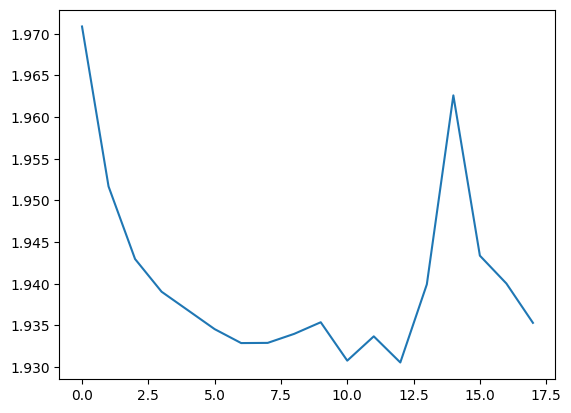

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [ ]:
# save model to disk
model.save('model3.keras')

In [ ]:
# copy to /content/drive/MyDrive/Springboard/Capstone 3

!cp model3.keras '/content/drive/MyDrive/Springboard/Capstone 3/'

In [ ]:
# load model from disk
model3 = tf.keras.models.load_model('/content/drive/MyDrive/Springboard/Capstone 3/model3.keras',
                                    custom_objects={'mse_with_positive_pressure': mse_with_positive_pressure})
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 25, 128)              67584     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 128)                  131584    ['lstm[0][0]']                
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_1[0][0]']              
                                                                                              

# Generate notes

To use the model to generate notes, you will first need to provide a starting sequence of notes. The function below generates one note from a sequence of notes.

For note pitch, it draws a sample from the softmax distribution of notes produced by the model, and does not simply pick the note with the highest probability.
Always picking the note with the highest probability would lead to repetitive sequences of notes being generated.

The `temperature` parameter can be used to control the randomness of notes generated. You can find more details on temperature in [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation).

In [ ]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

Now generate some notes. You can play around with temperature and the starting sequence in `next_notes` and see what happens.

In [ ]:
def create_audio(model, num_predictions=100, prompt_notes=raw_notes, temperature=2.0):

# temperature = 2.0
# num_predictions = 100

    sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

    # The initial sequence of notes; pitch is normalized similar to training
    # sequences
    input_notes = (
        sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

    generated_notes = []
    prev_start = 0
    for _ in range(num_predictions):
        pitch, step, duration = predict_next_note(input_notes, model, temperature)
        start = prev_start + step
        end = start + duration
        input_note = (pitch, step, duration)
        generated_notes.append((*input_note, start, end))
        input_notes = np.delete(input_notes, 0, axis=0)
        input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
        prev_start = start

    generated_notes = pd.DataFrame(
        generated_notes, columns=(*key_order, 'start', 'end'))

    return generated_notes

- First model

In [ ]:
m1notes = create_audio(model1)

In [ ]:
m1notes.head(10)

pitch      step  duration      start        end
0     64  0.644019  0.473591   0.644019   1.117610
1    103  2.943531  1.552999   3.587550   5.140549
2    100  2.370186  1.396145   5.957736   7.353881
3     96  2.275745  1.373079   8.233481   9.606560
4     93  2.246442  1.361632  10.479922  11.841554
5    100  2.240343  1.359297  12.720265  14.079562
6    103  2.240311  1.359079  14.960577  16.319655
7     95  2.256658  1.365900  17.217235  18.583135
8     94  2.238619  1.358443  19.455854  20.814297
9    103  2.220108  1.350417  21.675962  23.026379

In [ ]:
out_file = 'model1.mid'
out_pm = notes_to_midi(
    m1notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

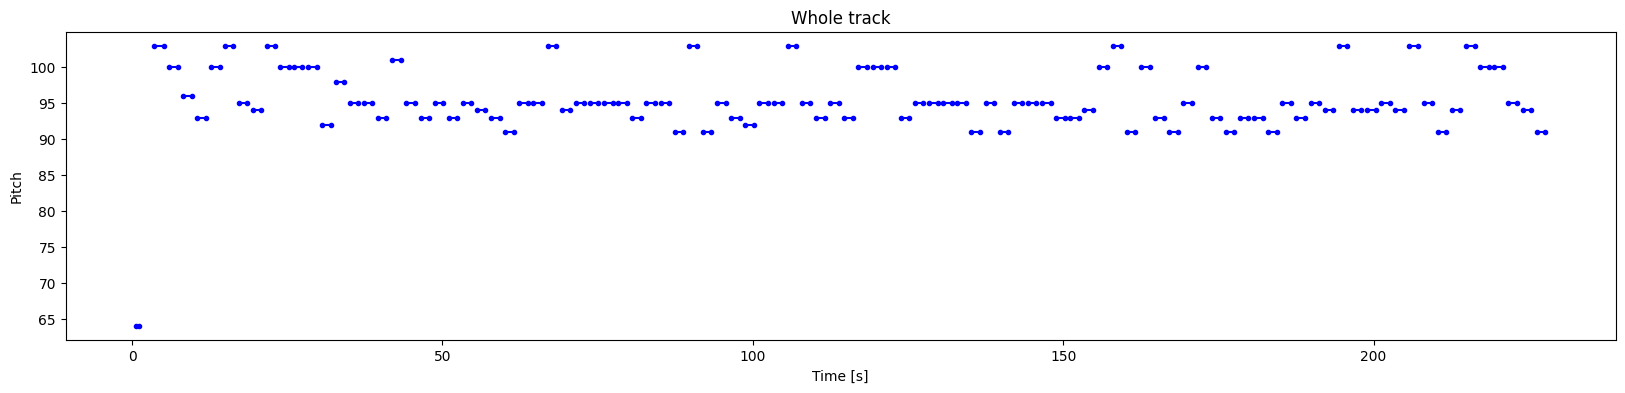

In [ ]:
plot_piano_roll(m1notes)

- Second model

In [ ]:
m2notes = create_audio(model2)

In [ ]:
m2notes.head(10)

pitch      step  duration     start       end
0     81  0.590164  0.353458  0.590164  0.943622
1     95  1.003307  0.185164  1.593472  1.778636
2     96  0.685999  0.176459  2.279470  2.455929
3     95  0.718844  0.245637  2.998314  3.243951
4    104  0.767275  0.251906  3.765589  4.017495
5    103  0.778584  0.253215  4.544172  4.797387
6    100  0.788400  0.253972  5.332572  5.586544
7    100  0.786787  0.251321  6.119360  6.370681
8     40  0.779581  0.257749  6.898941  7.156690
9     94  0.781959  0.255336  7.680900  7.936236

In [ ]:
out_file = 'model2.mid'
out_pm = notes_to_midi(
    m1notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

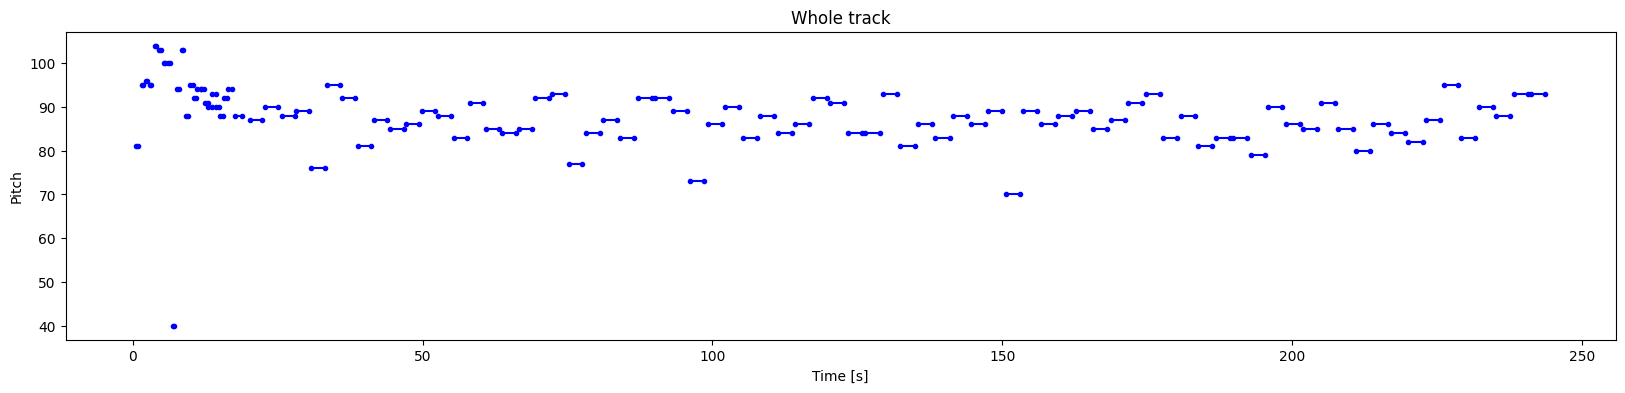

In [ ]:
plot_piano_roll(m2notes)

Check the distributions of `pitch`, `step` and `duration`.

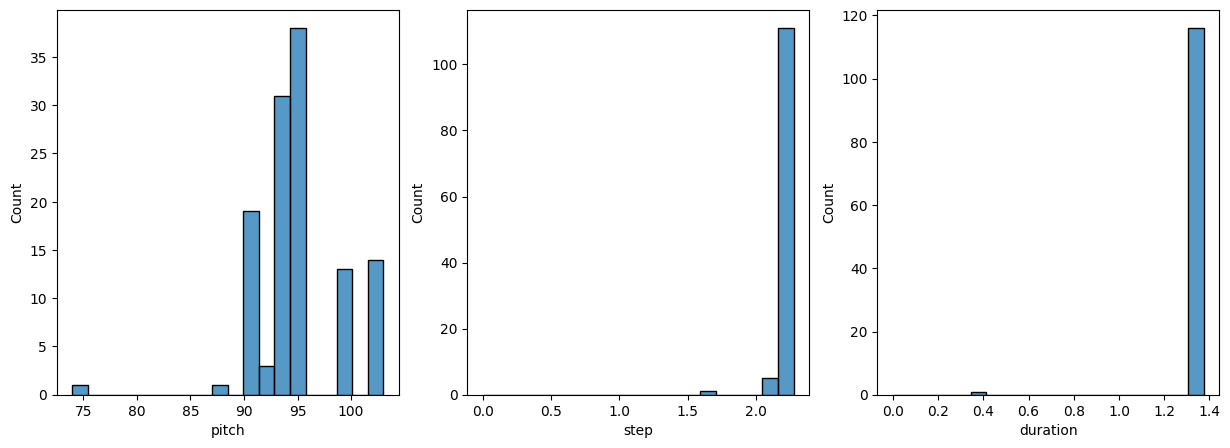

In [ ]:
plot_distributions(generated_notes)

- Last model

In [ ]:
out_file = 'model3.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

Visualize the generated notes.

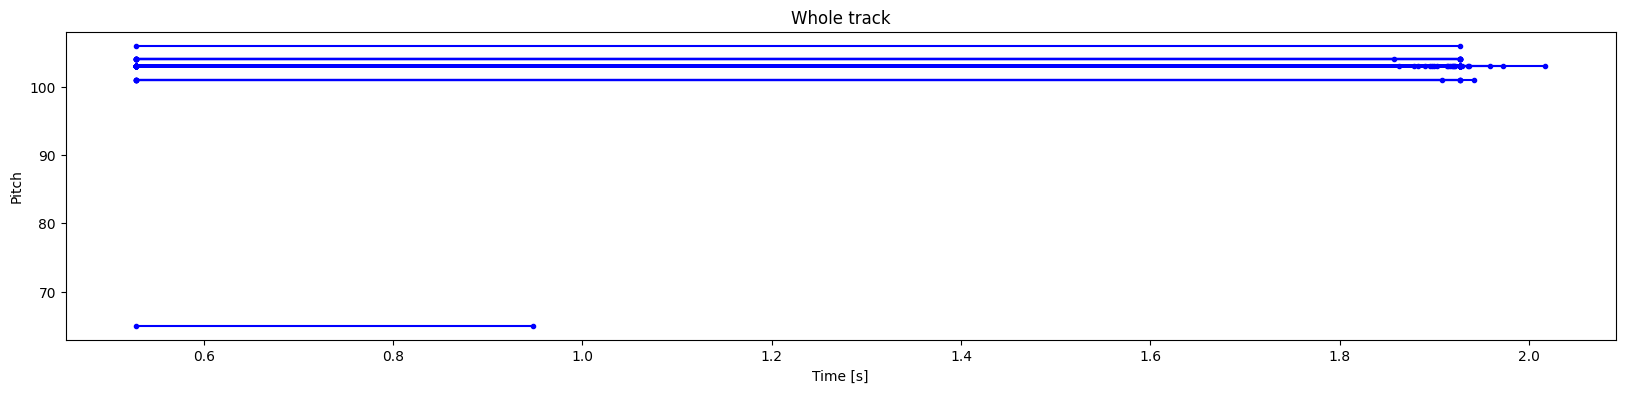

In [ ]:
plot_piano_roll(generated_notes)

In the above plots, we can see the change in distribution of the note variables.
Since there is a feedback loop between the model's outputs and inputs, the model tends to generate similar sequences of outputs to reduce the loss.
This is particularly relevant for `step` and `duration`, which uses the MSE loss.
For `pitch`, we can increase the randomness by increasing the `temperature` in `predict_next_note`.


# Compare the models with MSE

In [ ]:
lis=[]

In [ ]:
a=dict(
    model='model1',
    n_params=84354,
    notes='one 128 neuron lstm layer',
    total_loss=1.9285,
    duration_loss=0.1168,
    pitch_loss=3.4713,
    step_loss=1.6382,
)

lis.append(a)

In [ ]:
b=dict(
    model='model2',
    n_params=215938,
    notes='two 128 neuron lstm layer',
    total_loss=1.9502,
    duration_loss=0.1205,
    pitch_loss=3.5644,
    step_loss=1.6515,
)

lis.append(b)

In [ ]:
c=dict(
    model='model3',
    n_params=8898,
    notes='one 32 neuron lstm layer',
    total_loss=1.9353,
    duration_loss=0.1187,
    pitch_loss=3.4917,
    step_loss=1.6421,
)

lis.append(c)

In [ ]:
df=pd.DataFrame(lis)
df

model  n_params                      notes  total_loss  duration_loss  \
0  model1     84354  one 128 neuron lstm layer      1.9285         0.1168   
1  model2    215938  two 128 neuron lstm layer      1.9502         0.1205   
2  model3      8898   one 32 neuron lstm layer      1.9353         0.1187   

   pitch_loss  step_loss  
0      3.4713     1.6382  
1      3.5644     1.6515  
2      3.4917     1.6421

In [ ]:
df.sort_values(['total_loss'])

model  n_params                      notes  total_loss  duration_loss  \
0  model1     84354  one 128 neuron lstm layer      1.9285         0.1168   
2  model3      8898   one 32 neuron lstm layer      1.9353         0.1187   
1  model2    215938  two 128 neuron lstm layer      1.9502         0.1205   

   pitch_loss  step_loss  
0      3.4713     1.6382  
2      3.4917     1.6421  
1      3.5644     1.6515

- So the best model is model1, with a total loss of 1.9285.

- Next I'll take some sample music generated from each and rank them.

# Compare the models by a human (me)

- So again, what I'm doing here is using 10 different prompts, for each one, I'm giving it to each model and generating 100 notes from each. Comparing the quality of music based on my judgement.

In [ ]:
model_list=[model1,model2,model]

In [ ]:
count=10

In [ ]:
sample_file = filenames[101]
# sample_file = "/content/for_elise_by_beethoven.mid"
print(sample_file)

/content/content/midis/sch_ave.mid


In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

pitch      start        end      step  duration
0     65  62.812500  63.769531  0.000000  0.957031
1     72  63.759766  65.292969  0.947266  1.533203
2     72  65.312500  65.605469  1.552734  0.292969
3     72  65.644531  66.220703  0.332031  0.576172
4     71  66.240234  66.826172  0.595703  0.585938

In [ ]:
songs=[]

for c,v in enumerate(model_list):
    notes = create_audio(v)

    out_file = f'{c}_{count}.mid'
    out_pm = notes_to_midi(
        notes, out_file=out_file, instrument_name=instrument_name)

    songs.append(out_pm)

1/1 [==============================] - 0s 21ms/step


- So what I'm doing here is randomizing which song is played but preserving the true index so I can unbiasedly rank them and then score them and compare.

In [ ]:
import random

# Create pairs of (index, item)
indexed_objects = list(enumerate(songs))

# Randomly choose items without replacement
number_of_items_to_choose = 3
random_indexed_items = random.sample(indexed_objects, number_of_items_to_choose)

# Separate indices and items for further use
original_indices, random_items = zip(*random_indexed_items)

In [ ]:
display_audio(random_items[0])

In [ ]:
display_audio(random_items[1])

In [ ]:
display_audio(random_items[2])

In [ ]:
# Original indices
print("Original indices:", original_indices)

Original indices: (1, 2, 0)


- So after I did this about 10 times, it was clear that model 2 was significantly better than the other two. I picked it as having the best song everytime without a doubt.

**So** this is quite an interesting find. Model 1, the one that had medium complexity, scored the best on the MSE metric but Model 2, the one with the most complexity, scored the best on the human judgment by a landslide.